In [5]:
import astropy as apy
import pandas as pd

In [8]:
df = pd.read_excel('df_temp_all_0-2_last.xlsx')

In [25]:
df.head(3)

,year reset,year,temp c,anom c,modern anom c,modern temp c
0,0,-819888,-61.75,NaN,NaN,NaN
1,1069,-818819,-61.75,NaN,NaN,NaN
2,2138,-817750,-61.85,NaN,NaN,NaN


In [45]:
df['year reset dt'] = df['year reset'].apply(lambda x: pd.Period(year=x, freq='Y'))

In [47]:
df.set_index('year reset dt', inplace=True, drop=True)

In [48]:
df

,year reset,year,temp c,anom c,modern anom c,modern temp c
year reset dt,,,,,,
0,0,-819888,-61.75,NaN,NaN,NaN
1069,1069,-818819,-61.75,NaN,NaN,NaN
2138,2138,-817750,-61.85,NaN,NaN,NaN
3207,3207,-816681,-61.95,NaN,NaN,NaN
4276,4276,-815612,-62.15,NaN,NaN,NaN
...,...,...,...,...,...,...
821906,821906,2018,NaN,NaN,0.83,14.73
821907,821907,2019,NaN,NaN,0.91,14.81
821908,821908,2020,NaN,NaN,1.13,15.03


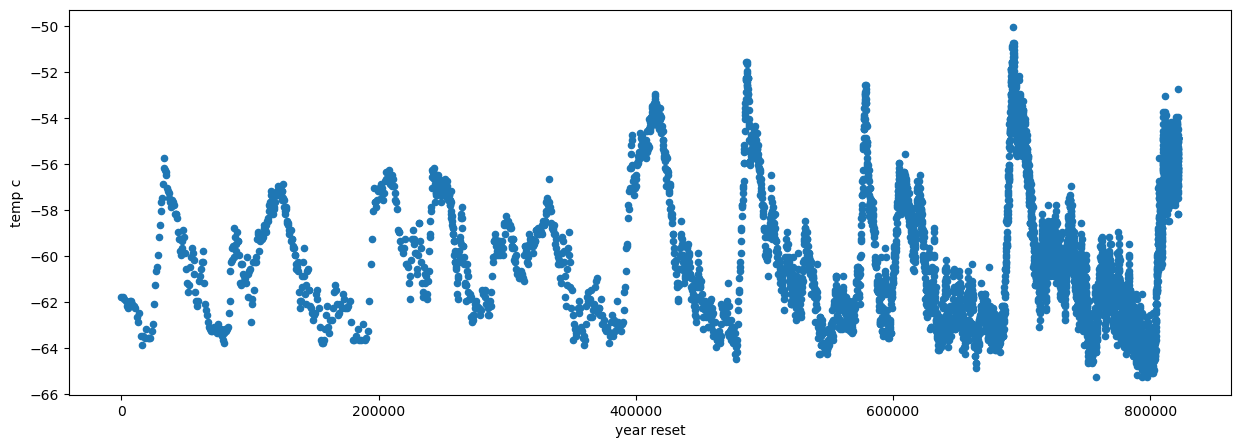

In [56]:
df.plot.scatter(x='year reset', y='temp c',figsize=(15,5));

In [102]:
import plotly.express as px

In [113]:
resampled_float = resampled.reset_index().astype(str).astype(float)

In [129]:
px.scatter(resampled_float, x='year reset dt', y='temp c mean'
           )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'year reset dt=%{x}<br>temp c mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([   999.,   1999.,   2999., ..., 819999., 820999., 821999.]),
              'xaxis': 'x',
              'y': array([-61.75      , -61.75      , -61.85      , ..., -55.91071429,
                          -55.74230769, -55.7475    ]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'year reset dt'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'temp c mean'}}}
})

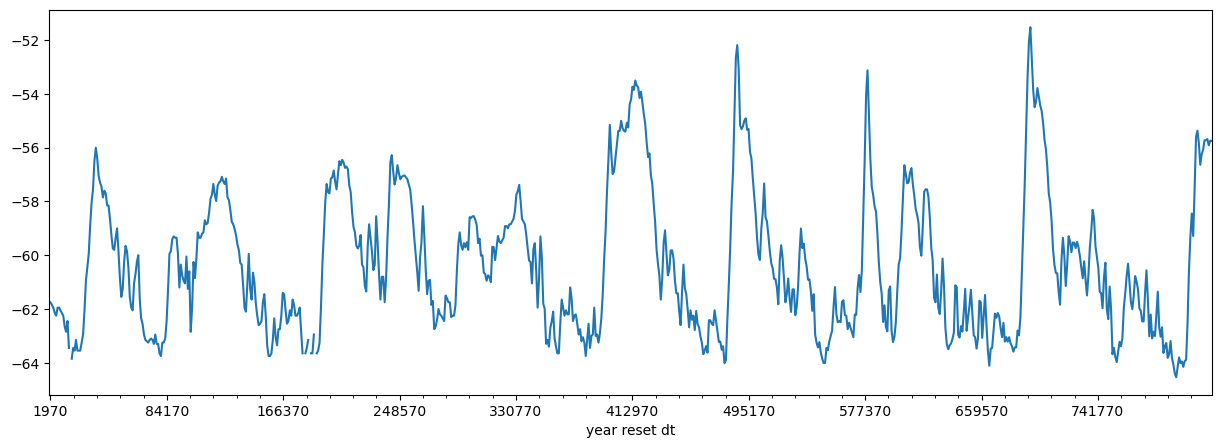

In [92]:
df.resample('1000Y')['temp c'].mean().plot(figsize=(15,5));
#to_frame().plot(kind='scatter') #.dropna()

In [79]:
#df['temp c resample 1000Y'] = 
resampled = df.resample('1000Y')['temp c'].mean().to_frame(name='temp c mean')

In [86]:
resampled.index = resampled.index.asfreq(df.index.freq)

In [89]:
df_with_mean = df.merge(resampled, left_index=True, right_index=True, how='outer')

In [91]:
df_with_mean.to_csv('df_with_mean.csv')

In [68]:
df.to_csv('df.csv')

In [ ]:
df_with_mean['cal anom c'] = df_with_mean['temp c'] - df_with_mean['temp c mean'] 

In [124]:
df_with_mean['temp c ffill'] = df_with_mean['temp c'].ffill(axis=0)

In [125]:
df_with_mean.tail(20)

,year reset,year,temp c,anom c,modern anom c,modern temp c,temp c resample 1000Y,temp c mean,temp c ffill
year reset dt,,,,,,,,,
821892,821892.0,2004.0,NaN,NaN,0.58,14.48,NaN,NaN,-54.85
821893,821893.0,2005.0,-54.85,NaN,0.74,14.64,NaN,NaN,-54.85
821894,821894.0,2006.0,NaN,NaN,0.63,14.53,NaN,NaN,-54.85
821895,821895.0,2007.0,NaN,NaN,0.93,14.83,NaN,NaN,-54.85
821896,821896.0,2008.0,NaN,NaN,0.29,14.19,NaN,NaN,-54.85
821897,821897.0,2009.0,NaN,NaN,0.66,14.56,NaN,NaN,-54.85
821898,821898.0,2010.0,NaN,NaN,0.74,14.64,NaN,NaN,-54.85
821899,821899.0,2011.0,NaN,NaN,0.55,14.45,NaN,NaN,-54.85
821900,821900.0,2012.0,NaN,NaN,0.48,14.38,NaN,NaN,-54.85


In [130]:
df_with_mean['temp c mean ffill'] = df_with_mean['temp c mean'].ffill(axis=0)
df_with_mean.tail(20)

,year reset,year,temp c,anom c,modern anom c,modern temp c,temp c resample 1000Y,temp c mean,temp c ffill,temp c mean ffill
year reset dt,,,,,,,,,,
821892,821892.0,2004.0,NaN,NaN,0.58,14.48,NaN,NaN,-54.85,-55.742308
821893,821893.0,2005.0,-54.85,NaN,0.74,14.64,NaN,NaN,-54.85,-55.742308
821894,821894.0,2006.0,NaN,NaN,0.63,14.53,NaN,NaN,-54.85,-55.742308
821895,821895.0,2007.0,NaN,NaN,0.93,14.83,NaN,NaN,-54.85,-55.742308
821896,821896.0,2008.0,NaN,NaN,0.29,14.19,NaN,NaN,-54.85,-55.742308
821897,821897.0,2009.0,NaN,NaN,0.66,14.56,NaN,NaN,-54.85,-55.742308
821898,821898.0,2010.0,NaN,NaN,0.74,14.64,NaN,NaN,-54.85,-55.742308
821899,821899.0,2011.0,NaN,NaN,0.55,14.45,NaN,NaN,-54.85,-55.742308
821900,821900.0,2012.0,NaN,NaN,0.48,14.38,NaN,NaN,-54.85,-55.742308
